

 House Sales in King County, USA 


In [1]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Load the csv:


In [ ]:
filepath=r'D:\maintain\house_sales_in_kings_count_usa.csv'
df = pd.read_csv(filepath)

In [7]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [9]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


In [11]:
df.drop(['id','Unnamed: 0'],axis =1,inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


 missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [13]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [14]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [15]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


In [16]:

df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Checking whether the houses with the waterfront view or without

<Axes: xlabel='waterfront', ylabel='price'>

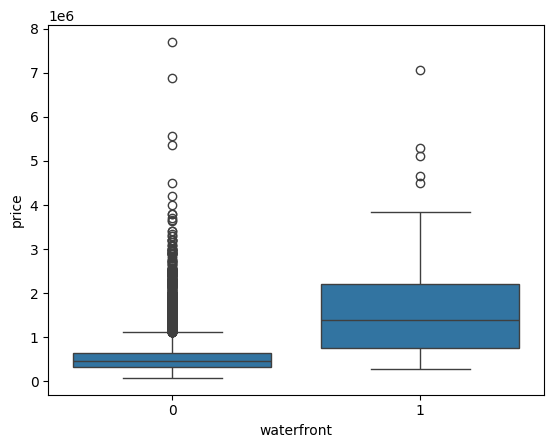

In [18]:
|sns.boxplot(x='waterfront', y='price', data=df)

<Axes: xlabel='sqft_above', ylabel='price'>

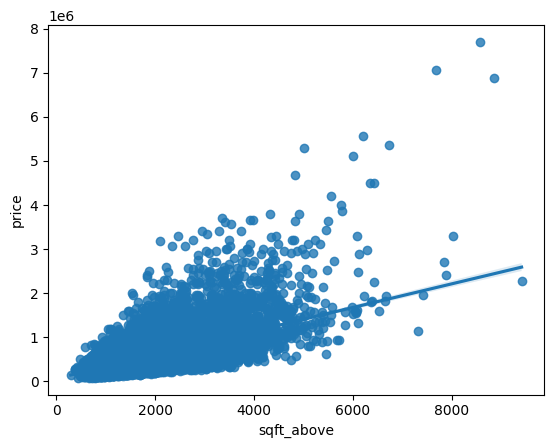

In [19]:

sns.regplot(x='sqft_above',y='price',data =df)

The feature other than price that is most correlated with price.


In [20]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


# Module 4: Model Development


We can Fit a linear regression model using the  various feature against price and  caculate the R^2.


### Feature Long



In [46]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Feature Sqft_living


In [30]:


lr = LinearRegression()
lr.fit(df[['sqft_living']], df['price'])
r_squared = lr.score(df[['sqft_living']], df['price']
                     )
print(f"R^2 score: {r_squared}")

R^2 score: 0.4928532179037931




Fit a linear regression model to predict the 'price' using the list of features:


In [37]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [32]:

lr = LinearRegression()
lr.fit(df[features], df['price'])
r_squared = lr.score(df[features], df['price'])
print(f"R^2 score: {r_squared}")

R^2 score: 0.65769516660375


### Working with Pipeline

In [33]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [39]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x = df[features]
y= df['price']
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x, y)
r_squared = pipe.score(x, y)
print(f"R^2 score: {r_squared}")

R^2 score: 0.7513408515988734


# Module 5: Model Evaluation and Refinement


In [41]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Ridge regression


In [44]:
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)
r_squared = model.score(x_test, y_test)
print(f"R^2 score: {r_squared}")

R^2 score: 0.6478759163939113


###

 a second order polynomial transform on both the training data and testing data.  fit a Ridge regression object

In [45]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', Ridge(alpha=0.1))]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
r_squared = pipe.score(x_test, y_test)
print(f"R^2 score: {r_squared}")

R^2 score: 0.711727181884104


## Summary:

### Q&A
* The R^2 score for the linear regression model using 'sqft\_living' to predict 'price' was 0.4929.
*  ** The R^2 score for the linear regression model using multiple features was 0.6577.
*   :** The R^2 score for the pipeline consisting of `StandardScaler`, `PolynomialFeatures` (degree 2), and `LinearRegression` was 0.7513.
*  The R^2 score for the Ridge regression model with `alpha` of 0.1 on the test data was 0.6479.
*    The R^2 score for the Ridge regression model with a second-order polynomial transformation and `alpha` of 0.1 on the transformed test data was 0.711.

### Data Analysis Key Findings
*   A simple linear regression model using only 'sqft\_living' as a predictor explained approximately 49.29% of the variance in house prices.
*   Incorporating multiple features significantly improved the model's performance, with a linear regression model achieving an R^2 score of 65.77%.
*   The use of a pipeline incorporating `StandardScaler`, `PolynomialFeatures` (degree 2), and `LinearRegression` resulted in the highest R^2 score of 75.13% among the models trained on the full dataset.
*   A Ridge regression model trained on a split dataset, using multiple features, achieved an R^2 score of 64.79% on the test data.
*   Applying a second-order polynomial transformation before Ridge regression (alpha=0.1) further improved the test set performance, yielding an R^2 score of 71.13%.

### Insights or Next Steps
*   Model complexity, through the addition of more features and polynomial transformations, generally leads to improved predictive performance, as evidenced by the R^2 scores increasing from 0.4929 to 0.7513.
*   Further hyperparameter tuning for Ridge regression (e.g., trying different `alpha` values) or exploring other advanced regression techniques could potentially lead to even higher R^2 scores and better model generalization.
